## Q1

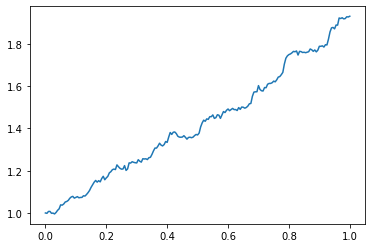

In [53]:
import numpy as np
import matplotlib . pyplot as plt
theta = 1 
mu=1
sigma = 0.1 
X0=0
# Plot sample path
m=200 
T=1
dt = T/m 
X=[X0]
for j in range(m):
    #each time add the path to the previous one
    X.append(X[-1] + theta*(mu-X[-1])*dt+sigma*np.sqrt(dt)*np.random.randn())
P = np.exp(np.array(X))
plt.plot(np.linspace(0,1,m+1), P)

In [54]:
#Estimate Expecation
n = 100000
P1 = [ ]
for i in range(n):
    X = [X0]
    for j in range(m):
        X.append(X[-1] + theta*(mu-X[-1])*dt+sigma*np.sqrt(dt)*np.random.randn())
    P1.append(np.exp(X[-1]))
print("Mean:", np.mean(P1), "Variance", np.var(P1))

Mean: 1.8878625260881963 Variance 0.015489798740419945


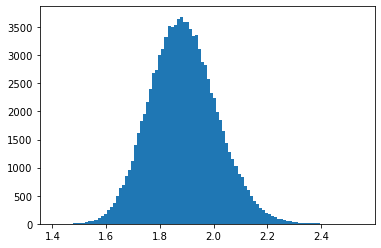

In [55]:
plt.hist(P1, bins=100)
plt.show()

## Q2

In [28]:
#initialize values
N = 20000
T=10
lamda = (2 + T + T**2)/100 
revenue = []
for i in range(N): 
    start = 0
    t=0 
    total_spend = 0
    n=0
    u1 = np.random.rand()
    t = start - np.log(u1)/lamda
    while t < T:
        u2 = np.random.rand()
        #generate uniform r.v. under lamda
        if u2 <= (2 + t + t**2)/100/lamda: 
            n=n+1
            #generate another uniform r.v. to sumulate probability
            u3 = np.random.rand()
            if u3 < 1/3: 
                spend = 100
            elif u3 < 2/3: 
                spend = 400
            else:
                spend = 900
            total_spend += spend
        start = t
        u1 = np.random.rand()
        t = start - np.log(u1)/lamda
    revenue.append(total_spend)
print('Expectation:' ,np.mean(revenue), "Variance:", np.var(revenue))

Expectation: 1880.47 Variance: 1303691.5790999997


## Q3

### (a)

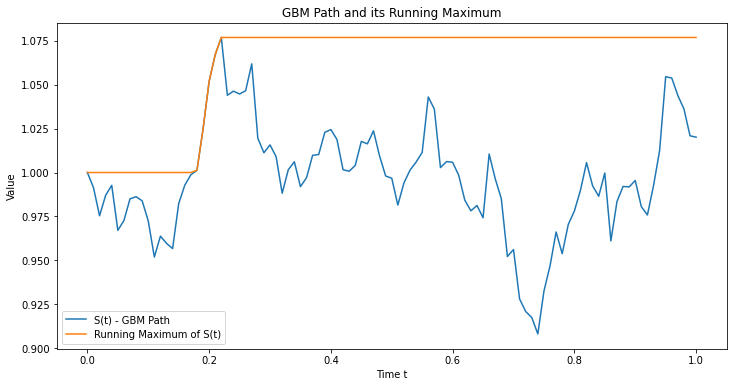

In [41]:
# Parameters for the GBM
T = 1           # time horizon
mu = 0.05       # drift
sigma = 0.15    # volatility
S0 = 1          # initial price
num_steps = 100 # number of time steps

# Time points
dt = T / num_steps
time_points = np.linspace(0, T, num_steps + 1)

# Simulating the GBM path
#np.random.seed(0)  # For reproducibility
W = np.random.normal(0, np.sqrt(dt), num_steps)  # Brownian increments
W = np.cumsum(W)  # Cumulative sum to get the Brownian path
W = np.concatenate(([0], W))  # Start from zero

S = S0 * np.exp((mu - 0.5 * sigma**2) * time_points + sigma * W)

# Calculate the running maximum
S_max = np.maximum.accumulate(S)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_points, S, label='S(t) - GBM Path')
plt.plot(time_points, S_max, label='Running Maximum of S(t)')
plt.title('GBM Path and its Running Maximum')
plt.xlabel('Time t')
plt.ylabel('Value')
plt.legend()
plt.show()

### (b)

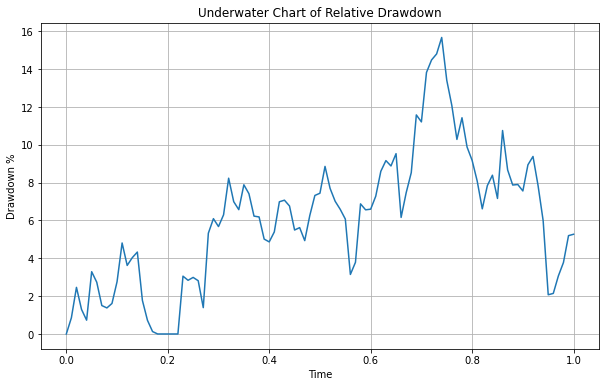

In [42]:

drawdown = 100 * (S_max - S) / S_max  # Relative drawdown in percentage

# Plotting the underwater chart
plt.figure(figsize=(10, 6))
plt.plot(time_points, drawdown)
plt.xlabel('Time')
plt.ylabel('Drawdown %')
plt.title('Underwater Chart of Relative Drawdown')
plt.grid(True)
plt.show()

### (c)

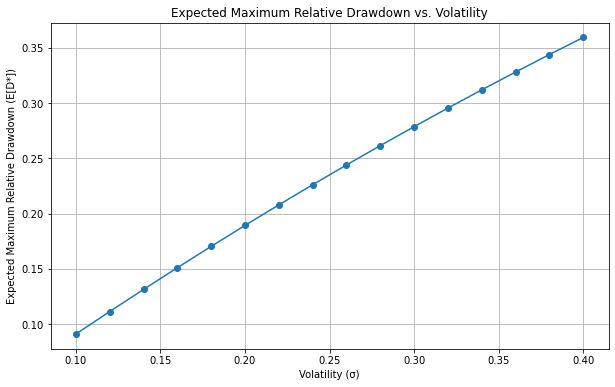

In [43]:

# Parameters
T = 1          
mu = 0.05      
S0 = 1         
# Volatility values from 10% to 40%
sigma_values = np.arange(0.10, 0.41, 0.02)  
n_samples = 10000  # Number of samples
n_steps = 100  # Time steps

# Function to simulate GBM paths
def simulate_gbm(mu, sigma, S0, T, n_steps, n_samples, bm_increments):
    dt = T / n_steps
    S = np.zeros((n_samples, n_steps + 1))
    S[:, 0] = S0
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * bm_increments[:, t-1])
    return S

# Brownian motion increments
bm_increments = np.random.normal(0, np.sqrt(T / n_steps), (n_samples, n_steps))

# Store expected maximum relative drawdowns for each sigma
expected_max_drawdowns = []

# Simulation
for sigma in sigma_values:
    S = simulate_gbm(mu, sigma, S0, T, n_steps, n_samples, bm_increments)
    running_max = np.maximum.accumulate(S, axis=1)
    relative_drawdown = 1 - S / running_max
    max_relative_drawdown = relative_drawdown.max(axis=1)
    expected_max_drawdowns.append(max_relative_drawdown.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, expected_max_drawdowns, marker='o')
plt.xlabel('Volatility (σ)')
plt.ylabel('Expected Maximum Relative Drawdown (E[D*])')
plt.title('Expected Maximum Relative Drawdown vs. Volatility')
plt.grid(True)
plt.show()

As observed, the expected maximum relative drawdown generally increases linearly with the increase in volatility. This indicates that higher volatility in the price process of an asset leads to a greater potential for larger drawdowns.